# Context
Phase three of this project is data cleanup and dimensionality reduction.\
This notebook drives this process for the data that went through the
transformations in PH2.

In [1]:
# Set project's environment variables
import os
import sys
from dotenv import load_dotenv
load_dotenv(dotenv_path="../project.env")
sys.path.append(os.environ["PYTHONPATH"])

import pickle

In [2]:
# Import project-wide and PH2 specific variables and functions
import superheader as sup
import PH3header as ph3

In [3]:
PH3_IS_W2 = True

if PH3_IS_W2:
  prePH3_ROOT = sup.PH2_DATA_ROOT
  PH3_SUB_DATA_ROOT = os.path.join(sup.PH3_DATA_ROOT, sup.PH3_W2_CODE)
  PH3_SUB_BINGEN_ROOT = os.path.join(sup.PH3_BINGEN_ROOT, sup.PH3_W2_CODE)
  PH3_SUB_MEDIAGEN_ROOT = os.path.join(sup.PH3_MEDIAGEN_ROOT, sup.PH3_W2_CODE)
else:
  prePH3_ROOT = sup.PH1_DATA_ROOT
  PH3_SUB_DATA_ROOT = os.path.join(sup.PH3_DATA_ROOT, sup.PH3_WO2_CODE)
  PH3_SUB_BINGEN_ROOT = os.path.join(sup.PH3_BINGEN_ROOT, sup.PH3_WO2_CODE)
  PH3_SUB_MEDIAGEN_ROOT = os.path.join(sup.PH3_MEDIAGEN_ROOT, sup.PH3_WO2_CODE)

sup.report_dir_if_not_exists(prePH3_ROOT)
sup.create_dir_if_not_exists(PH3_SUB_DATA_ROOT)
sup.create_dir_if_not_exists(PH3_SUB_BINGEN_ROOT)
sup.create_dir_if_not_exists(PH3_SUB_MEDIAGEN_ROOT)

# Source dataframe loading

In [4]:
import pandas as pd

## Active hand detection

In [5]:
prePH3_ah_frame_df = pd.read_csv(os.path.join(prePH3_ROOT, f"{sup.DATA_AH_PF}.csv"))
prePH3_ah_frame_df

,fileid,person_id,cycle_num,handedness,class_name,class_numeric,current_frame,active_hand,h_v1x,h_v1y,...,wh18z,wh19x,wh19y,wh19z,wh20x,wh20y,wh20z,cp_h_mean_x,cp_h_mean_y,cp_h_mean_z
0,p01/Ciclo_1_5_Derecha/Ciclo_1_5_Derecha_1.mp4,p01,1,0,1,28,0,1,-0.252658,-0.960174,...,-1.496243,1.340849,-0.171718,-1.513621,1.300539,-0.161612,-1.510126,-2.180056,0.679906,0.004815
1,p01/Ciclo_1_5_Derecha/Ciclo_1_5_Derecha_1.mp4,p01,1,0,1,28,0,0,-0.183331,0.963443,...,2.995543,2.238554,1.044659,2.945471,2.305495,1.061692,2.958340,-3.066664,0.836726,0.345399
2,p01/Ciclo_1_5_Derecha/Ciclo_1_5_Derecha_1.mp4,p01,1,0,1,28,1,1,-0.262734,-0.954708,...,-1.504761,1.345379,-0.152317,-1.519155,1.292013,-0.138151,-1.517701,-2.270537,0.782116,-0.050007
3,p01/Ciclo_1_5_Derecha/Ciclo_1_5_Derecha_1.mp4,p01,1,0,1,28,1,0,-0.190576,0.959635,...,2.963912,2.262379,1.098462,2.917810,2.334147,1.116839,2.930263,-3.170062,0.966835,0.267387
4,p01/Ciclo_1_5_Derecha/Ciclo_1_5_Derecha_1.mp4,p01,1,0,1,28,2,1,-0.279238,-0.950641,...,-1.503658,1.295732,-0.168057,-1.518374,1.239794,-0.152745,-1.516320,-2.370136,0.741557,0.011406
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91746,p11/Ciclo_5_5_Izquierda/Ciclo_5_5_Izquierda_z.mp4,p11,5,1,z,27,9,1,-0.246658,-0.945336,...,1.518278,1.543923,-0.745791,1.535597,1.635684,-0.770878,1.537495,-1.505613,1.061272,-0.031634
91747,p11/Ciclo_5_5_Izquierda/Ciclo_5_5_Izquierda_z.mp4,p11,5,1,z,27,10,1,-0.122481,-0.972688,...,1.413643,1.462179,-0.480662,1.414897,1.547520,-0.487985,1.418145,-1.399091,1.097829,-0.072567
91748,p11/Ciclo_5_5_Izquierda/Ciclo_5_5_Izquierda_z.mp4,p11,5,1,z,27,10,0,0.463611,0.289227,...,0.512181,-0.081858,1.666662,0.520316,-0.115102,1.715198,0.515583,-2.749760,1.409419,-0.133295
91749,p11/Ciclo_5_5_Izquierda/Ciclo_5_5_Izquierda_z.mp4,p11,5,1,z,27,11,1,0.099678,-0.982737,...,2.012829,1.744368,-0.157489,1.995327,1.734795,-0.159833,2.016875,-1.365585,1.082710,-0.014325


# Cleanup

## Identify numeric columns which will go through standardization and dimensionality reduction

In [6]:
if PH3_IS_W2:
  ah_pf_dataCols = sup.pf_wrist_hand_landmark_columns+sup.pf_chest_pose_landmark_columns+sup.pf_h_v123_columns
else:
  ah_pf_dataCols = sup.pf_hand_landmark_columns+sup.pf_pose_landmark_columns

## Standardize data

In [7]:
from sklearn.preprocessing import StandardScaler

In [8]:
ah_pf_scaler = StandardScaler()

PH3_AH_FRM_std_df = prePH3_ah_frame_df[sup.tag_columns+sup.class_columns+[sup.current_frame_col]]
PH3_AH_FRM_std_df[ah_pf_dataCols] = ah_pf_scaler.fit_transform(prePH3_ah_frame_df[ah_pf_dataCols])

PH3_AH_FRM_std_df

/var/folders/y5/xympzvrs537ffwjygt2x7wnh0000gn/T/ipykernel_24509/683750519.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  PH3_AH_FRM_std_df[ah_pf_dataCols] = ah_pf_scaler.fit_transform(prePH3_ah_frame_df[ah_pf_dataCols])
/var/folders/y5/xympzvrs537ffwjygt2x7wnh0000gn/T/ipykernel_24509/683750519.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  PH3_AH_FRM_std_df[ah_pf_dataCols] = ah_pf_scaler.fit_transform(prePH3_ah_frame_df[ah_pf_dataCols])
/var/folders/y5/xympzvrs537ffwjygt2x7wnh0000gn/T/ipykernel_2

,fileid,person_id,cycle_num,handedness,class_name,class_numeric,active_hand,current_frame,wh0x,wh0y,...,cp_h_mean_z,h_v1x,h_v1y,h_v1z,h_v2x,h_v2y,h_v2z,h_v3x,h_v3y,h_v3z
0,p01/Ciclo_1_5_Derecha/Ciclo_1_5_Derecha_1.mp4,p01,1,0,1,28,1,0,0.759894,-0.857701,...,-0.889221,-0.722812,-1.010391,0.619858,0.178826,-1.190594,0.914937,-0.074172,0.212750,1.497866
1,p01/Ciclo_1_5_Derecha/Ciclo_1_5_Derecha_1.mp4,p01,1,0,1,28,0,0,1.429315,0.613008,...,0.738906,-0.532118,1.260890,0.318159,0.404679,1.086952,0.744194,0.293939,0.096360,-0.535249
2,p01/Ciclo_1_5_Derecha/Ciclo_1_5_Derecha_1.mp4,p01,1,0,1,28,1,1,0.749318,-0.830694,...,-1.151290,-0.750526,-1.003937,0.539085,0.166558,-1.188291,0.822507,-0.078597,0.170474,1.513498
3,p01/Ciclo_1_5_Derecha/Ciclo_1_5_Derecha_1.mp4,p01,1,0,1,28,0,1,1.446012,0.680820,...,0.365978,-0.552047,1.256394,0.272659,0.383127,1.085728,0.678532,0.282011,0.073216,-0.533549
4,p01/Ciclo_1_5_Derecha/Ciclo_1_5_Derecha_1.mp4,p01,1,0,1,28,1,2,0.716460,-0.848918,...,-0.857709,-0.795922,-0.999135,0.556337,0.145392,-1.188663,0.814122,-0.051614,0.163535,1.542284
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91746,p11/Ciclo_5_5_Izquierda/Ciclo_5_5_Izquierda_z.mp4,p11,5,1,z,27,1,9,0.977574,-1.594954,...,-1.063459,-0.706308,-0.992872,0.247007,0.036919,-1.167358,0.312102,-0.056518,0.784294,-0.360771
91747,p11/Ciclo_5_5_Izquierda/Ciclo_5_5_Izquierda_z.mp4,p11,5,1,z,27,1,10,0.924295,-1.240562,...,-1.259135,-0.364741,-1.025167,0.310985,0.502359,-1.149878,0.376395,-0.111397,0.776350,-0.446176
91748,p11/Ciclo_5_5_Izquierda/Ciclo_5_5_Izquierda_z.mp4,p11,5,1,z,27,0,10,-0.168094,1.394927,...,-1.549439,1.247383,0.464819,-2.228502,-0.471712,0.797212,-1.667198,-1.996198,-1.924402,-0.657941
91749,p11/Ciclo_5_5_Izquierda/Ciclo_5_5_Izquierda_z.mp4,p11,5,1,z,27,1,11,1.063259,-0.817215,...,-0.980714,0.246336,-1.037033,0.474832,0.952508,-1.116767,0.681487,-0.012357,0.624129,-0.258323


## Save standardizers

In [9]:
with open(os.path.join(PH3_SUB_BINGEN_ROOT, f"scaler_{sup.DATA_AH_PF}.pkl"), 'wb') as f:
  pickle.dump(ah_pf_scaler, f)

# Dimensionality Reduction

## Helper functions

In [10]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.pipeline import make_pipeline
from sklearn.kernel_approximation import Nystroem
from sklearn.decomposition import PCA
import umap.umap_ as umap

/Users/diego/miniconda3/envs/TOG_PH3_v1/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [11]:
def flatten_video(group):
  data_cols = [col for col in group.columns if col not in 
                sup.tag_columns + sup.class_columns + [sup.current_frame_col]]

  flattened_dict = {}

  frame_list = []
  for _, row in group.iterrows():
      frame_num = int(row[sup.current_frame_col])
      frame_list.append(frame_num)
      prefix = f"f{frame_num}_"
      for col in data_cols:
          flattened_dict[prefix + col] = row[col]

  if frame_list != [i for i in range(12)]:
     print("Big probelm 2")
     print(frame_list)
     print(group.iloc[0][sup.tag_columns])

  # Add the group keys (the tags)
  group_keys = group.iloc[0][sup.tag_columns + sup.class_columns].to_dict()
  group_keys.update(flattened_dict)
  return pd.DataFrame([group_keys])

In [12]:
def visualize(origin_df, data_cols, data_unit, label_col, reducer_name, kernel_name=""):    
    fig = plt.figure(figsize=(10, 7))
    ax = fig.add_subplot(111, projection='3d')

    if label_col == sup.active_hand_col:
        filtered_df = origin_df
    else:
        spf_df = origin_df[origin_df[sup.active_hand_col] == 1]
        if data_unit == sup.DATA_S_PF:
            filtered_df = spf_df
        elif data_unit == sup.DATA_S_PV:
            filtered_df = spf_df\
                .groupby(sup.tag_columns+sup.class_columns)\
                .apply(flatten_video).reset_index(drop=True)

    labels_cat = filtered_df[label_col].astype('category')
    categories = labels_cat.cat.categories
    cat_to_idx = {cat: i for i, cat in enumerate(categories)}
    colors = labels_cat.map(cat_to_idx)
    cmap = plt.cm.Spectral

    if reducer_name == sup.PH3_REDUCER_NAME_PCA:
        reducer = PCA(n_components=3, random_state=42)
    elif reducer_name == sup.PH3_REDUCER_NAME_UMAP:
        reducer = umap.UMAP(n_components=3, random_state=42)
    elif reducer_name == sup.PH3_REDUCER_NAME_KPCA:
        nystroem = Nystroem(kernel=kernel_name, gamma=0.5, n_components=500)
        reducer = make_pipeline(nystroem, PCA(n_components=3, random_state=42))

    if data_unit == sup.DATA_S_PV:
        filtered_data = reducer.fit_transform(filtered_df.drop(columns=sup.tag_columns+sup.class_columns))
    else:
        data = reducer.fit_transform(origin_df.drop(columns=sup.tag_columns+sup.class_columns+[sup.current_frame_col]))
        if label_col == sup.active_hand_col:
            filtered_data = data
        else:
            filtered_data = data[origin_df[sup.active_hand_col] == 1]
    
    sc = ax.scatter(filtered_data[:, 0], filtered_data[:, 1], filtered_data[:, 2], c=colors, cmap=cmap, s=20)

    for cat, idx in cat_to_idx.items():
        ax.scatter([], [], [], color=cmap(idx / (len(categories) - 1)), label=cat)
    ax.legend(title=label_col)

    figtitle = f"{reducer_name}-{kernel_name}-{data_unit}"
    ax.set_title(figtitle)

    PH3_SUB3_MEDIAGEN_ROOT = os.path.join(PH3_SUB_MEDIAGEN_ROOT, reducer_name, kernel_name)
    sup.create_dir_if_not_exists(PH3_SUB3_MEDIAGEN_ROOT)
    figpath = os.path.join(PH3_SUB3_MEDIAGEN_ROOT, f"{figtitle}.png")
    plt.savefig(figpath, dpi=300, bbox_inches='tight')

    plt.show()

def writeout(origin_df, data_cols, label_cols, reducer_name, kernel_name=""):
    for n in sup.PH3_N_CANDIDATES:
        if reducer_name == sup.PH3_REDUCER_NAME_PCA:
            reducer = PCA(n_components=n, random_state=42)
        elif reducer_name == sup.PH3_REDUCER_NAME_UMAP:
            reducer = umap.UMAP(n_components=n, random_state=42)
        elif reducer_name == sup.PH3_REDUCER_NAME_KPCA:
            nystroem = Nystroem(kernel=kernel_name, gamma=0.5, n_components=500)
            reducer = make_pipeline(nystroem, PCA(n_components=n, random_state=42))

        data = reducer.fit_transform(origin_df[data_cols])

        reduced_df = pd.DataFrame(data)
        reduced_df[sup.tag_columns+label_cols+[sup.current_frame_col]] = origin_df[sup.tag_columns+label_cols+[sup.current_frame_col]]

        PH3_SUB3_DATA_ROOT = os.path.join(PH3_SUB_DATA_ROOT, reducer_name, kernel_name)
        sup.create_dir_if_not_exists(PH3_SUB3_DATA_ROOT)
        PH3_SUB3_BINGEN_ROOT = os.path.join(PH3_SUB_BINGEN_ROOT, reducer_name, kernel_name)
        sup.create_dir_if_not_exists(PH3_SUB3_BINGEN_ROOT)

        reduced_df.to_csv(os.path.join(PH3_SUB3_DATA_ROOT, f"{sup.DATA_AH_PF}_{n}.csv"), index=False)
        with open(os.path.join(PH3_SUB3_BINGEN_ROOT, f"{sup.DATA_AH_PF}{n}.pkl"), 'wb') as f:
            pickle.dump(reducer, f)

## PCA

In [13]:
PH3_AH_FRM_PCA_df = PH3_AH_FRM_std_df.copy()

### Active hand detection

#### Exploration

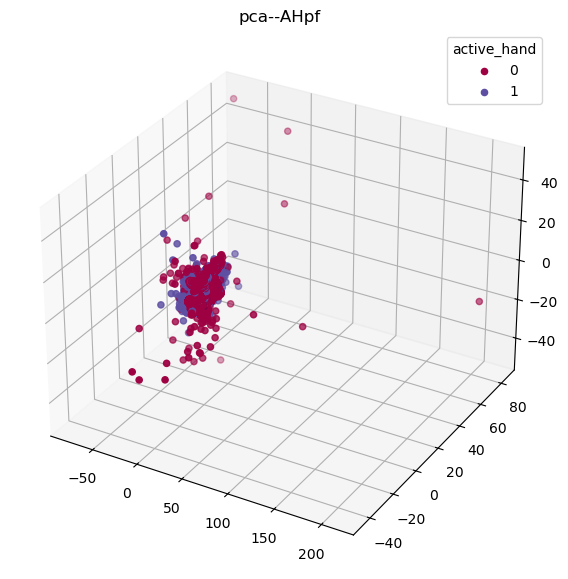

In [14]:
visualize(origin_df=PH3_AH_FRM_PCA_df, data_cols=ah_pf_dataCols, data_unit=sup.DATA_AH_PF, label_col=sup.active_hand_col, reducer_name=sup.PH3_REDUCER_NAME_PCA, kernel_name='')

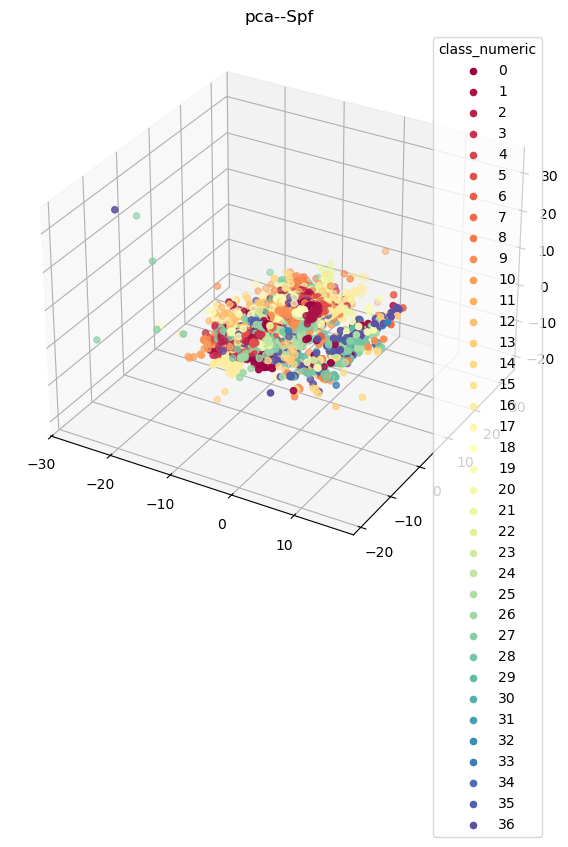

In [15]:
visualize(origin_df=PH3_AH_FRM_PCA_df, data_cols=ah_pf_dataCols, data_unit=sup.DATA_S_PF, label_col=sup.class_numeric_column, reducer_name=sup.PH3_REDUCER_NAME_PCA, kernel_name='')

/var/folders/y5/xympzvrs537ffwjygt2x7wnh0000gn/T/ipykernel_24509/472059142.py:14: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(flatten_video).reset_index(drop=True)


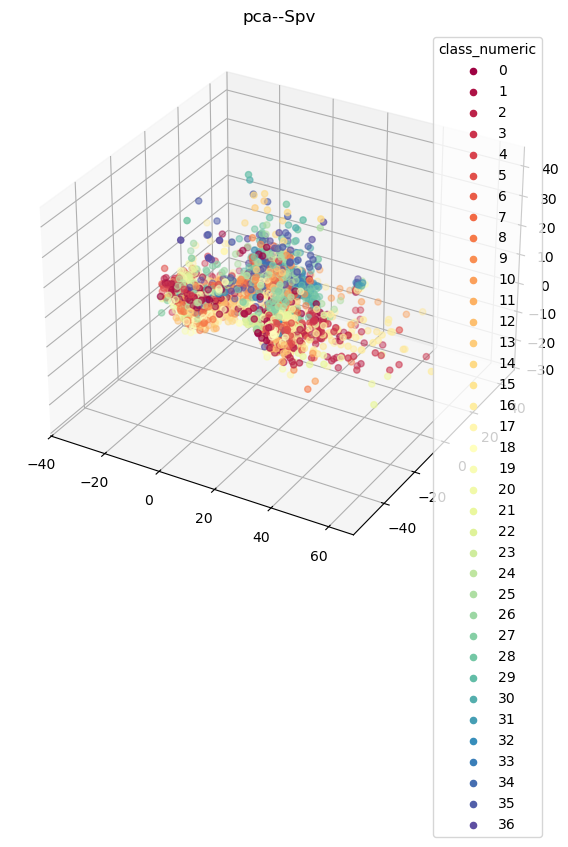

In [16]:
visualize(origin_df=PH3_AH_FRM_PCA_df, data_cols=ah_pf_dataCols, data_unit=sup.DATA_S_PV, label_col=sup.class_numeric_column, reducer_name=sup.PH3_REDUCER_NAME_PCA, kernel_name='')

#### Writeout

In [17]:
writeout(origin_df=PH3_AH_FRM_PCA_df, data_cols=ah_pf_dataCols, label_cols=sup.class_columns, reducer_name=sup.PH3_REDUCER_NAME_PCA, kernel_name='')

## Kernel PCA

In [18]:
PH3_AH_FRM_KPCA_df = PH3_AH_FRM_std_df.copy()

### Active hand detection

In [19]:
PH3_AH_FRM_KPCA_df

,fileid,person_id,cycle_num,handedness,class_name,class_numeric,active_hand,current_frame,wh0x,wh0y,...,cp_h_mean_z,h_v1x,h_v1y,h_v1z,h_v2x,h_v2y,h_v2z,h_v3x,h_v3y,h_v3z
0,p01/Ciclo_1_5_Derecha/Ciclo_1_5_Derecha_1.mp4,p01,1,0,1,28,1,0,0.759894,-0.857701,...,-0.889221,-0.722812,-1.010391,0.619858,0.178826,-1.190594,0.914937,-0.074172,0.212750,1.497866
1,p01/Ciclo_1_5_Derecha/Ciclo_1_5_Derecha_1.mp4,p01,1,0,1,28,0,0,1.429315,0.613008,...,0.738906,-0.532118,1.260890,0.318159,0.404679,1.086952,0.744194,0.293939,0.096360,-0.535249
2,p01/Ciclo_1_5_Derecha/Ciclo_1_5_Derecha_1.mp4,p01,1,0,1,28,1,1,0.749318,-0.830694,...,-1.151290,-0.750526,-1.003937,0.539085,0.166558,-1.188291,0.822507,-0.078597,0.170474,1.513498
3,p01/Ciclo_1_5_Derecha/Ciclo_1_5_Derecha_1.mp4,p01,1,0,1,28,0,1,1.446012,0.680820,...,0.365978,-0.552047,1.256394,0.272659,0.383127,1.085728,0.678532,0.282011,0.073216,-0.533549
4,p01/Ciclo_1_5_Derecha/Ciclo_1_5_Derecha_1.mp4,p01,1,0,1,28,1,2,0.716460,-0.848918,...,-0.857709,-0.795922,-0.999135,0.556337,0.145392,-1.188663,0.814122,-0.051614,0.163535,1.542284
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91746,p11/Ciclo_5_5_Izquierda/Ciclo_5_5_Izquierda_z.mp4,p11,5,1,z,27,1,9,0.977574,-1.594954,...,-1.063459,-0.706308,-0.992872,0.247007,0.036919,-1.167358,0.312102,-0.056518,0.784294,-0.360771
91747,p11/Ciclo_5_5_Izquierda/Ciclo_5_5_Izquierda_z.mp4,p11,5,1,z,27,1,10,0.924295,-1.240562,...,-1.259135,-0.364741,-1.025167,0.310985,0.502359,-1.149878,0.376395,-0.111397,0.776350,-0.446176
91748,p11/Ciclo_5_5_Izquierda/Ciclo_5_5_Izquierda_z.mp4,p11,5,1,z,27,0,10,-0.168094,1.394927,...,-1.549439,1.247383,0.464819,-2.228502,-0.471712,0.797212,-1.667198,-1.996198,-1.924402,-0.657941
91749,p11/Ciclo_5_5_Izquierda/Ciclo_5_5_Izquierda_z.mp4,p11,5,1,z,27,1,11,1.063259,-0.817215,...,-0.980714,0.246336,-1.037033,0.474832,0.952508,-1.116767,0.681487,-0.012357,0.624129,-0.258323


#### Exploration

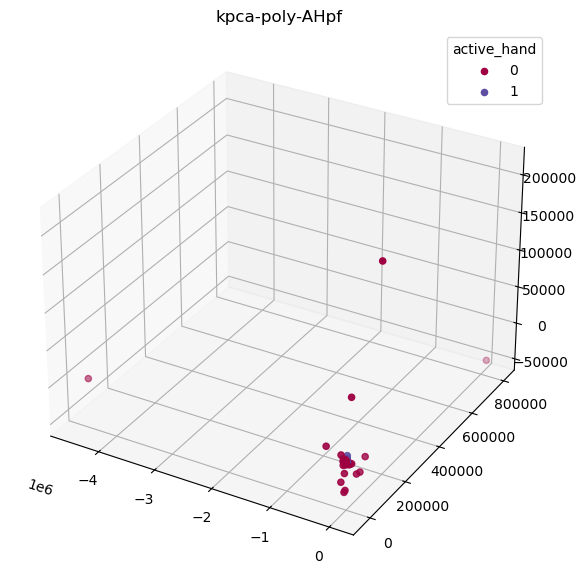

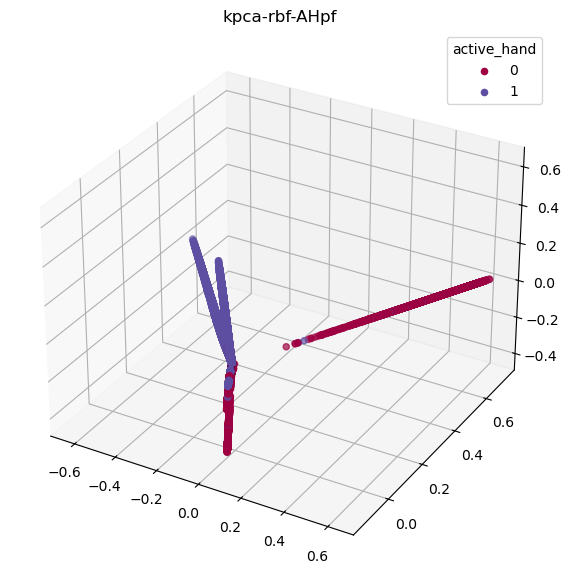

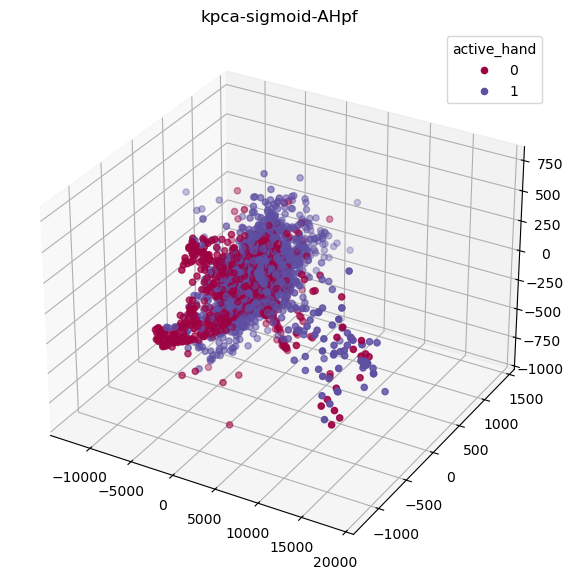

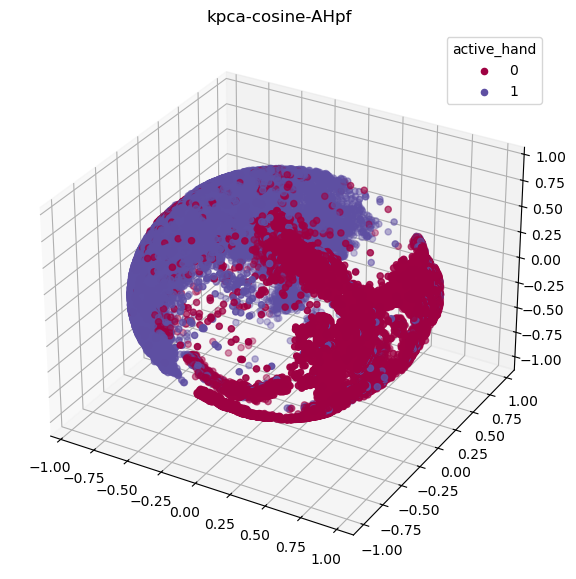

In [20]:
for kernel_name in sup.PH3_REDUCER_KERNEL_NAMES:
  visualize(origin_df=PH3_AH_FRM_KPCA_df, data_cols=ah_pf_dataCols, data_unit=sup.DATA_AH_PF, label_col=sup.active_hand_col, reducer_name=sup.PH3_REDUCER_NAME_KPCA, kernel_name=kernel_name)

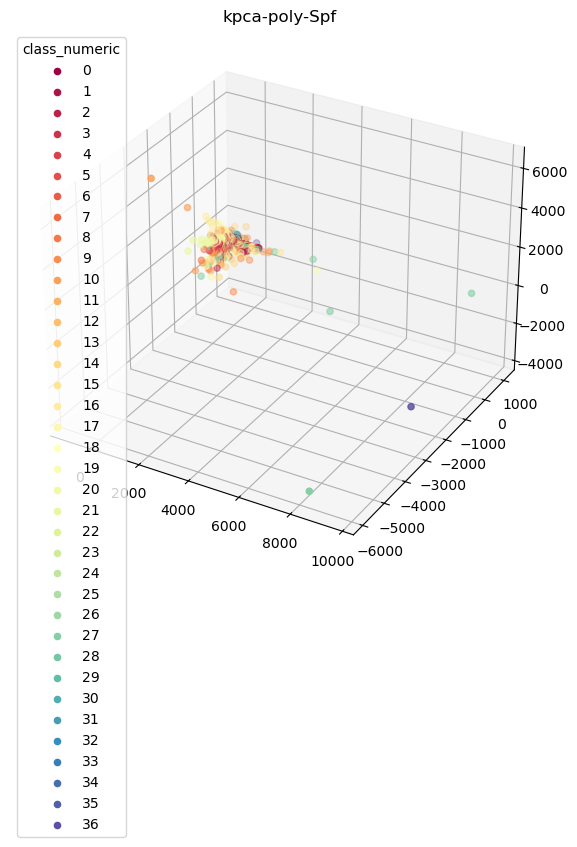

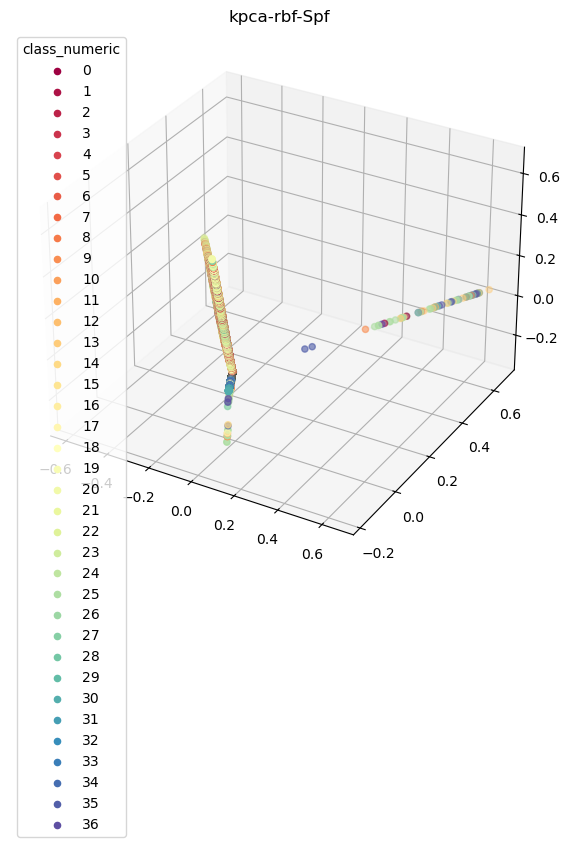

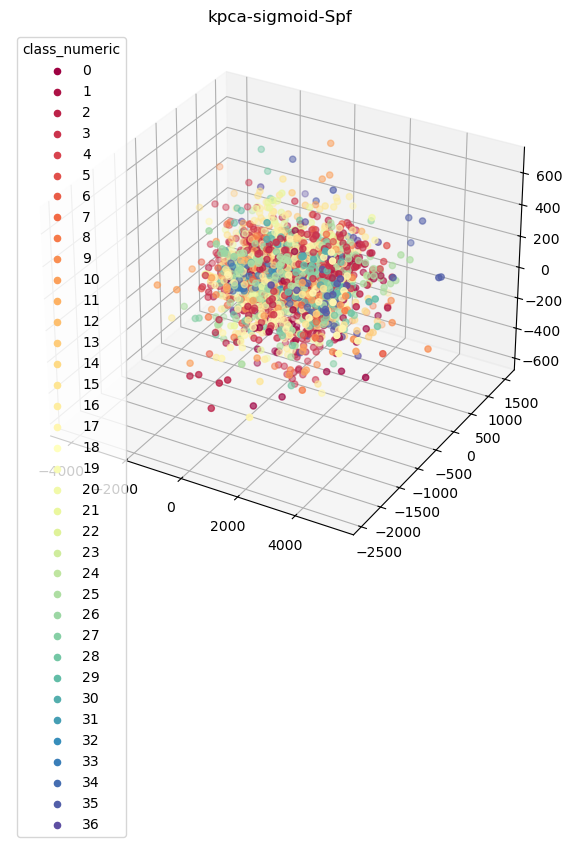

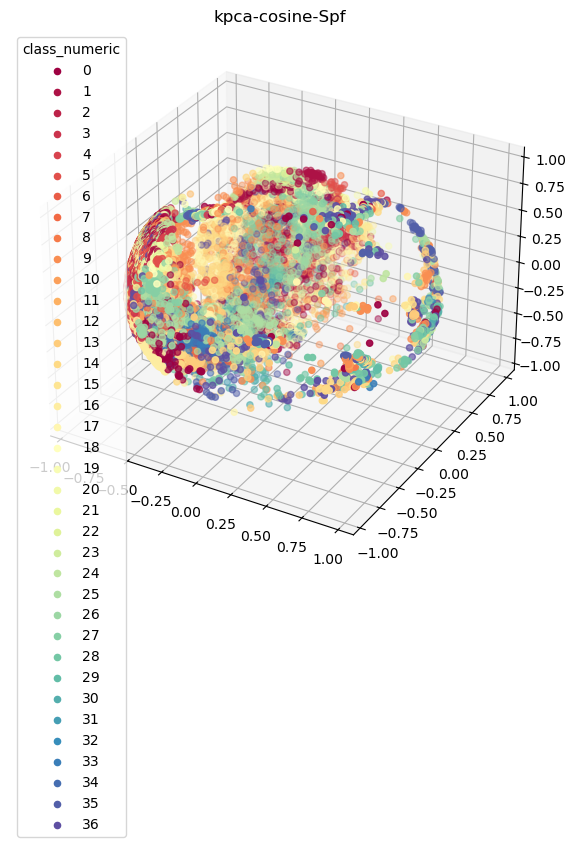

In [21]:
for kernel_name in sup.PH3_REDUCER_KERNEL_NAMES:
  visualize(origin_df=PH3_AH_FRM_KPCA_df, data_cols=ah_pf_dataCols, data_unit=sup.DATA_S_PF, label_col=sup.class_numeric_column, reducer_name=sup.PH3_REDUCER_NAME_KPCA, kernel_name=kernel_name)

/var/folders/y5/xympzvrs537ffwjygt2x7wnh0000gn/T/ipykernel_24509/472059142.py:14: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(flatten_video).reset_index(drop=True)


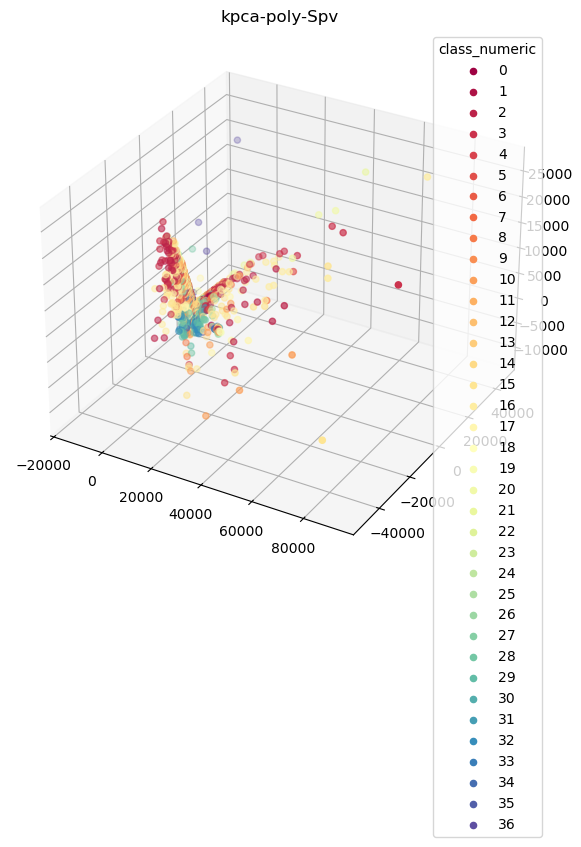

/var/folders/y5/xympzvrs537ffwjygt2x7wnh0000gn/T/ipykernel_24509/472059142.py:14: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(flatten_video).reset_index(drop=True)


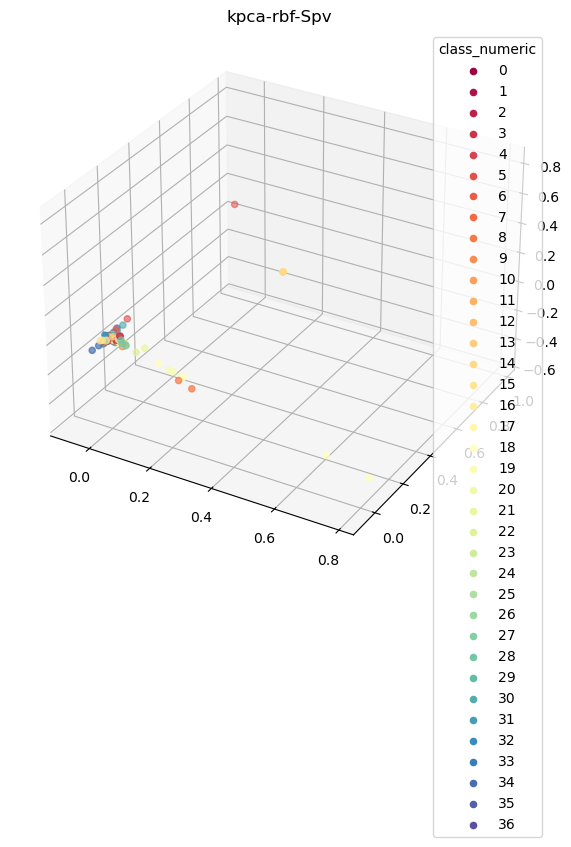

/var/folders/y5/xympzvrs537ffwjygt2x7wnh0000gn/T/ipykernel_24509/472059142.py:14: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(flatten_video).reset_index(drop=True)


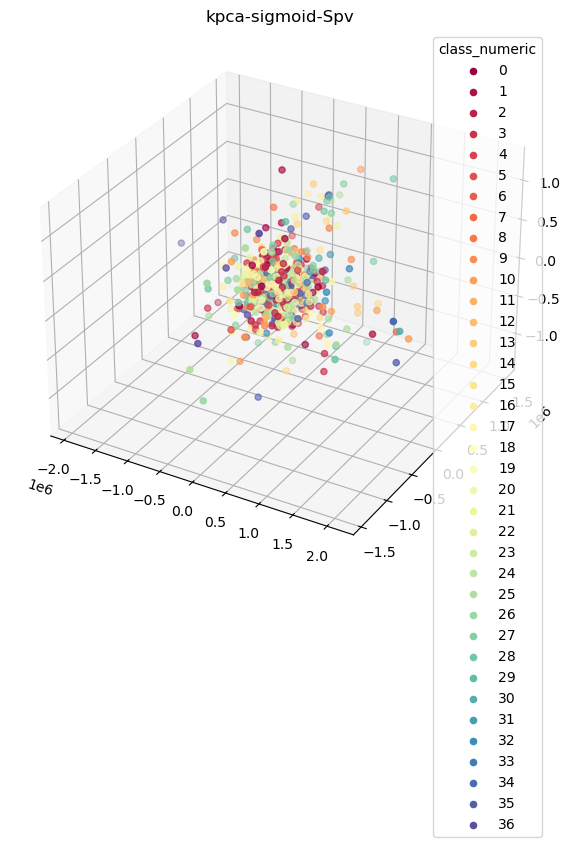

/var/folders/y5/xympzvrs537ffwjygt2x7wnh0000gn/T/ipykernel_24509/472059142.py:14: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(flatten_video).reset_index(drop=True)


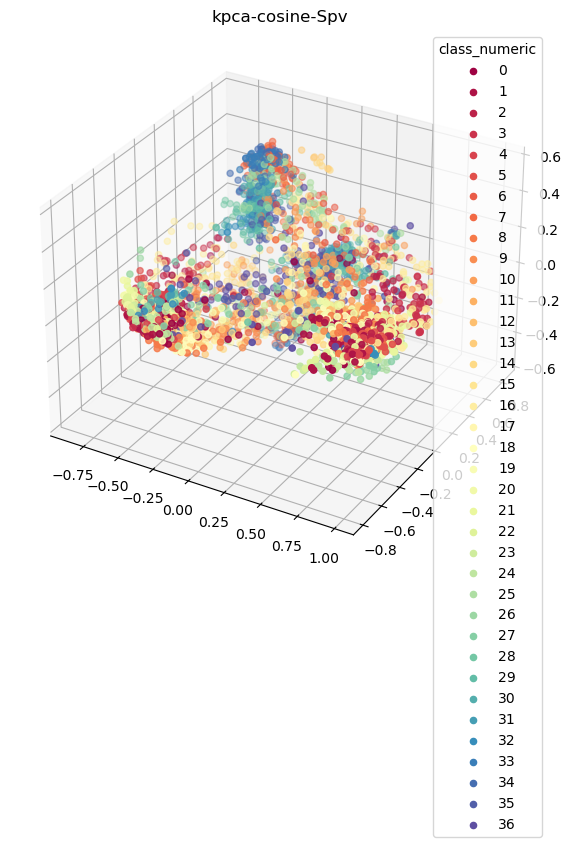

In [22]:
for kernel_name in sup.PH3_REDUCER_KERNEL_NAMES:
  visualize(origin_df=PH3_AH_FRM_KPCA_df, data_cols=ah_pf_dataCols, data_unit=sup.DATA_S_PV, label_col=sup.class_numeric_column, reducer_name=sup.PH3_REDUCER_NAME_KPCA, kernel_name=kernel_name)

#### Writeout

In [23]:
for kernel_name in sup.PH3_REDUCER_KERNEL_NAMES:
  writeout(origin_df=PH3_AH_FRM_KPCA_df, data_cols=ah_pf_dataCols, label_cols=sup.class_columns, reducer_name=sup.PH3_REDUCER_NAME_KPCA, kernel_name=kernel_name)

## UMAP

In [24]:
PH3_AH_FRM_UMAP_df = PH3_AH_FRM_std_df.copy()

### Active hand detection

#### Exploration

/Users/diego/miniconda3/envs/TOG_PH3_v1/lib/python3.10/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(
OMP: Info #276: omp_set_nested routine deprecated, please use omp_set_max_active_levels instead.


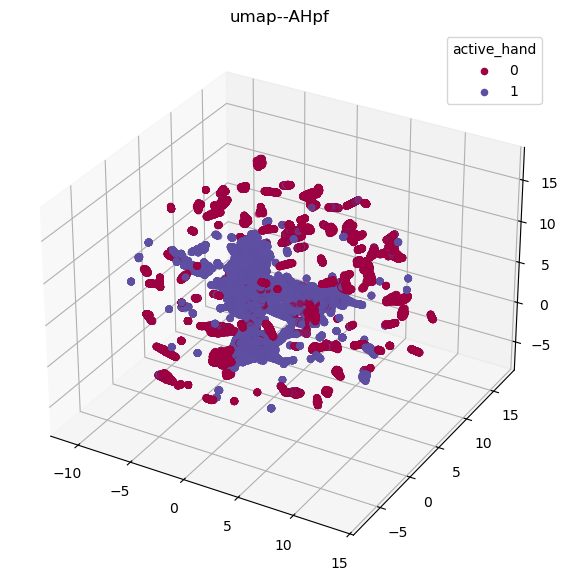

In [25]:
visualize(origin_df=PH3_AH_FRM_UMAP_df, data_cols=ah_pf_dataCols, data_unit=sup.DATA_AH_PF, label_col=sup.active_hand_col, reducer_name=sup.PH3_REDUCER_NAME_UMAP, kernel_name='')

/Users/diego/miniconda3/envs/TOG_PH3_v1/lib/python3.10/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


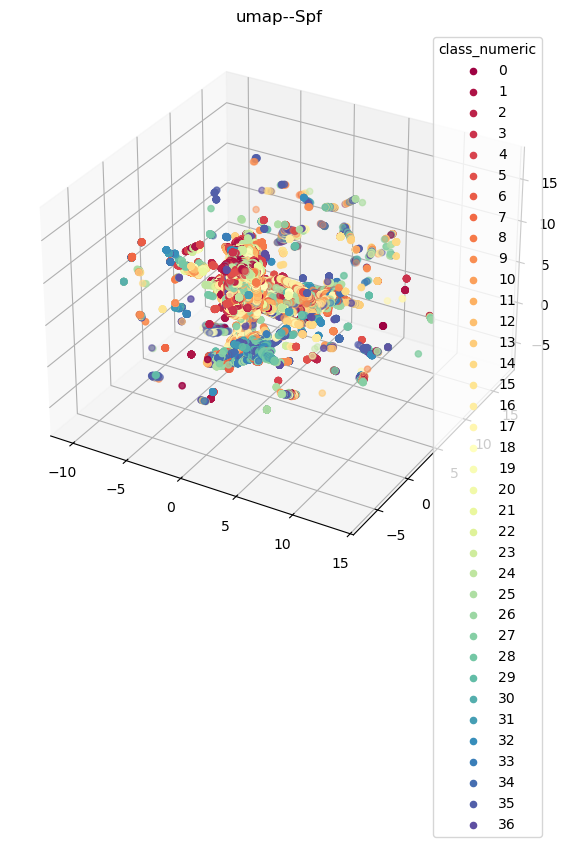

In [26]:
visualize(origin_df=PH3_AH_FRM_UMAP_df, data_cols=ah_pf_dataCols, data_unit=sup.DATA_S_PF,label_col=sup.class_numeric_column, reducer_name=sup.PH3_REDUCER_NAME_UMAP, kernel_name='')

/var/folders/y5/xympzvrs537ffwjygt2x7wnh0000gn/T/ipykernel_24509/472059142.py:14: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(flatten_video).reset_index(drop=True)
/Users/diego/miniconda3/envs/TOG_PH3_v1/lib/python3.10/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


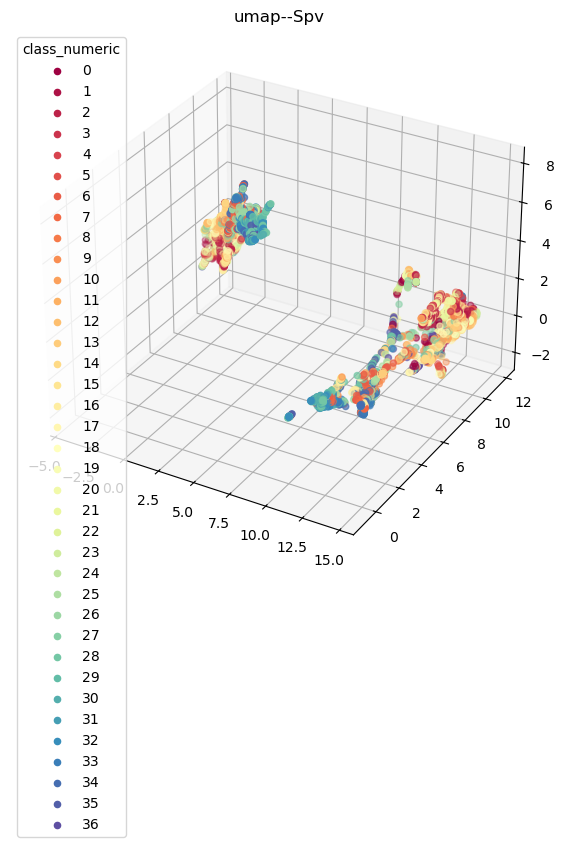

In [27]:
visualize(origin_df=PH3_AH_FRM_UMAP_df, data_cols=ah_pf_dataCols, data_unit=sup.DATA_S_PV,label_col=sup.class_numeric_column, reducer_name=sup.PH3_REDUCER_NAME_UMAP, kernel_name='')

#### Writeout

In [28]:
writeout(origin_df=PH3_AH_FRM_UMAP_df, data_cols=ah_pf_dataCols, label_cols=sup.class_columns, reducer_name=sup.PH3_REDUCER_NAME_UMAP, kernel_name='')

/Users/diego/miniconda3/envs/TOG_PH3_v1/lib/python3.10/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(
/Users/diego/miniconda3/envs/TOG_PH3_v1/lib/python3.10/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(
/Users/diego/miniconda3/envs/TOG_PH3_v1/lib/python3.10/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(
/Users/diego/miniconda3/envs/TOG_PH3_v1/lib/python3.10/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(
/Users/diego/miniconda3/envs/TOG_PH3_v1/lib/python3.10/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(
/Users/diego/miniconda3/e